<a href="https://colab.research.google.com/github/insomaniac2k2/Time-Series-Forecasting/blob/main/Time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting fundamentals with TensorFlow

## Get the data

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-05-29 06:32:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-05-29 06:32:43 (7.29 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series with pandas

In [2]:
import pandas as pd
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", 
                 parse_dates=['Date'],
                 index_col=['Date'])

In [3]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
len(df)

2787

8 years worth of data only contains 2787 samples.

In [6]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)': "Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


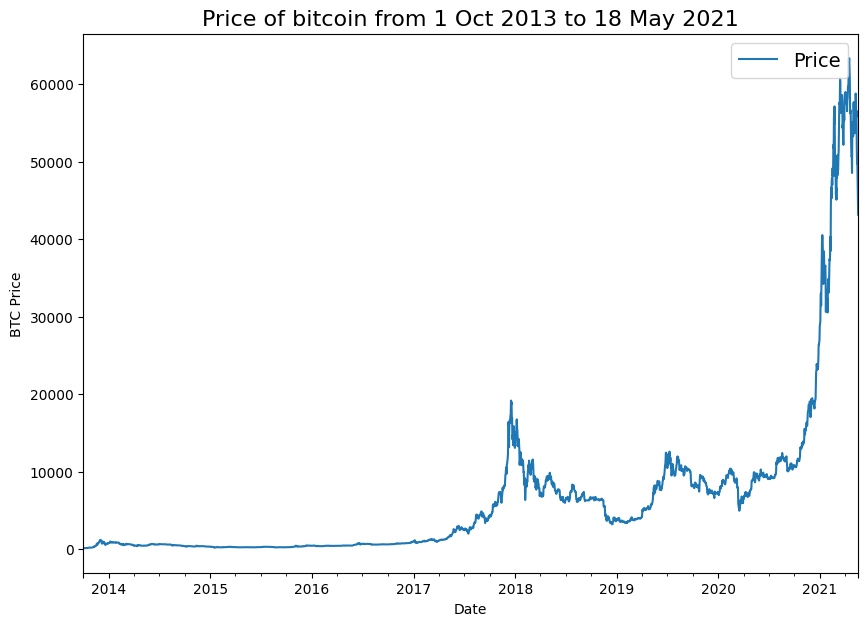

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7));
plt.ylabel("BTC Price")
plt.title('Price of bitcoin from 1 Oct 2013 to 18 May 2021', fontsize=16)
plt.legend(fontsize=14);

##Importing time series data with Python's CSV module

In [8]:
import csv
from datetime import datetime

timesteps=[]
btc_price=[]
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", 'r') as f:
  csv_reader = csv.reader(f,delimiter=",")
  next(csv_reader) # Skip first line (titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d")) #get dates as dates not string
    btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

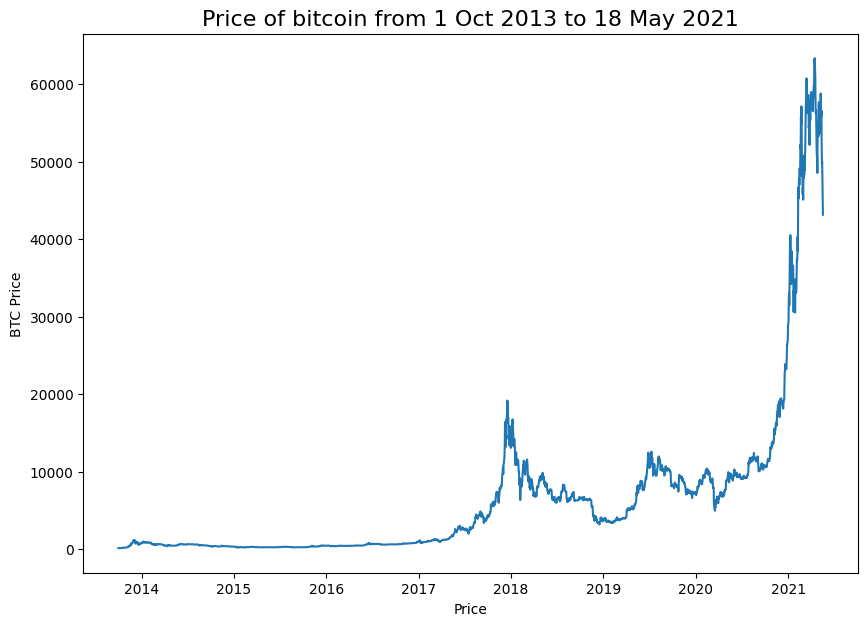

In [9]:
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.xlabel('Price')
plt.title('Price of bitcoin from 1 Oct 2013 to 18 May 2021', fontsize=16);

## Format data part 1: Create train and test sets of our time series data

### Create train and test sets of our time series data (the wrong way)

In [10]:
bitcoin_prices[:5]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [11]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape

((2229,), (558,))

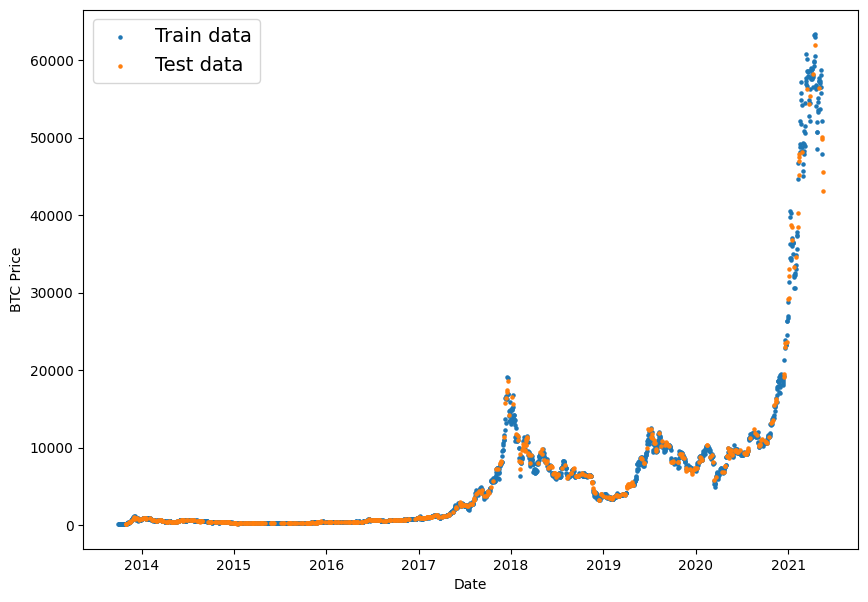

In [13]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend(fontsize=14)
plt.show();

### Create train and test sets for time series (right way)

In [14]:
split_size = int(0.8 * len(prices))
X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

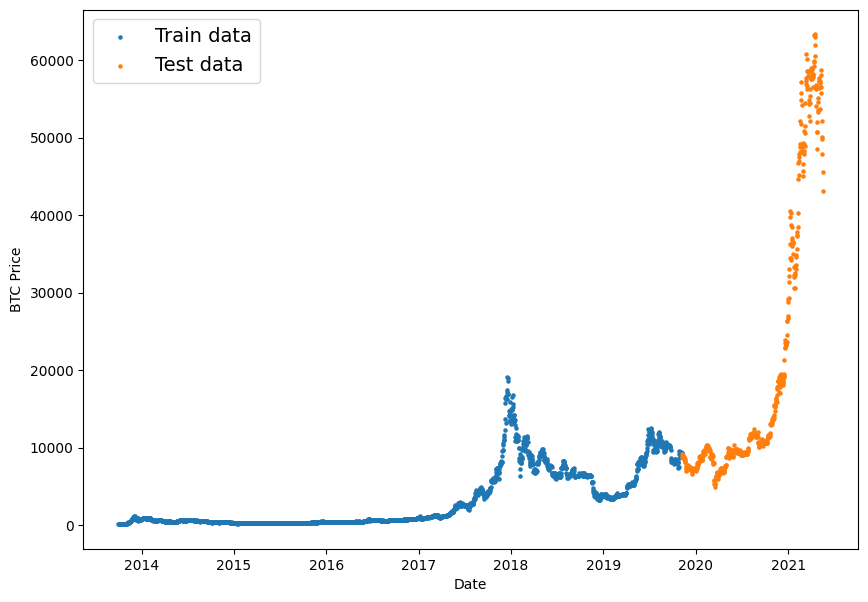

In [15]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend(fontsize=14)
plt.show();

## Create plotting function

In [16]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  #plt.figure(figsize=(10,7))
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14);
  plt.grid(True)

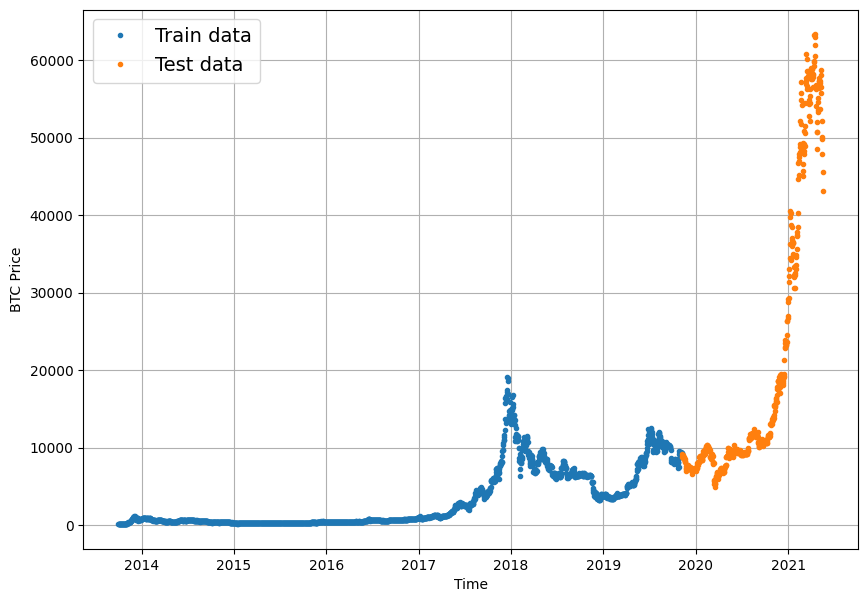

In [17]:
plt.figure(figsize=(10,7))
plot_time_series(X_train, y_train, label='Train data')
plot_time_series(X_test, y_test, label='Test data')

* **Horizon** = number of timesteps we're going to predict into the future
* **Window size** = number of timesteps we're going to use to predict horizon 

## Model 0: Naive forecast (baseline)

Formula: 
$$\hat{y}_{t} = y_{t-1} $$

In [18]:
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

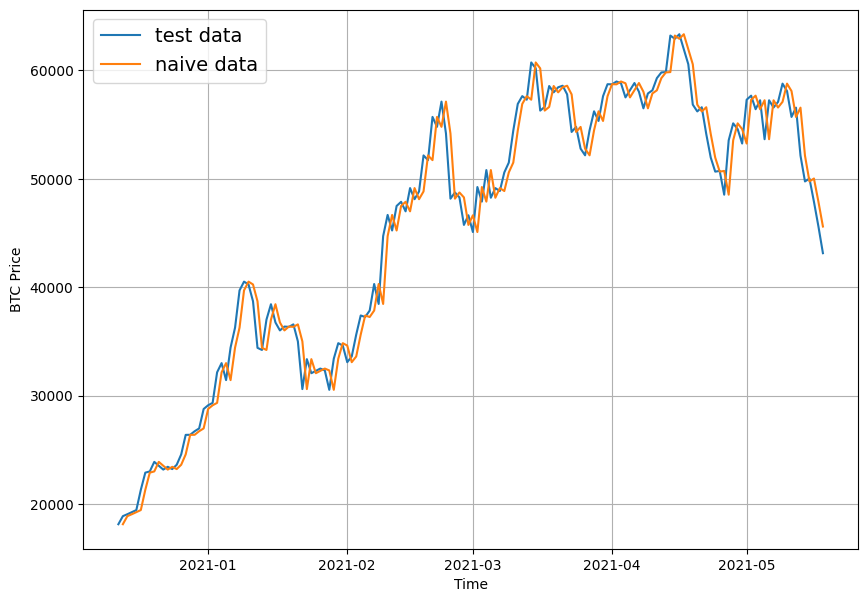

In [19]:
plt.figure(figsize=(10,7))
# plot_time_series(X_train, y_train, label='train data')
plot_time_series(X_test, y_test, start=400, format='-', label='test data')
plot_time_series(X_test[1:], naive_forecast, start=400, format='-', label='naive data')

## Evaluating a time series model

In [20]:
import tensorflow as tf

In [21]:
def mean_absolute_scale_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae / mae_naive_no_season

In [22]:
mean_absolute_scale_error(y_test[1:], naive_forecast).numpy()

0.9995699939182624

In [23]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scale_error(y_true, y_pred)

  return {'mae': mae.numpy(),
          'mse': mse.numpy(),
          'rmse': rmse.numpy(),
          'mape': mape.numpy(),
          'mase': mase.numpy()}

In [24]:
naive_results = evaluate_preds(y_test[1:], naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Format data part 2: Windowing our dataset
we window our time series dataset to turn our data into a supervised learning problem

```
Windowing for one week
[0,1,2,3,4,5,6] -> [7]
[1,2,3,4,5,6,7] -> [8]
[2,3,4,5,6,7,8] -> [9]
```

In [25]:
print(f"We want to use {btc_price[:7]} to predict {btc_price[7]}")

We want to use [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict 123.033


In [26]:
Horizon = 1
Window_size = 7

In [27]:
def get_labelled_windows(x, horizon=Horizon):
  '''
  if horizon=1
  [0,1,2,3,4,5,6,7] -> Output: ([0,1,2,3,4,5,6],[7])
  '''
  return x[:, :-horizon], x[:, -horizon:]

In [28]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>)

In [29]:
def make_windows(x, window_size=Window_size, horizon=Horizon):
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size+horizon-1)), axis=0).T

  print(f'Window indexes:\n {window_indexes, window_indexes.shape}')

  windowed_array = x[window_indexes]

  windows, labels = get_labelled_windows(windowed_array, horizon)
  return windows, labels

In [30]:
full_windows, full_labels = make_windows(prices)

Window indexes:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


In [31]:
for i in range(3):
  print(f"Windows: {full_windows[i-3]} -> label: {full_labels[i-3]}")

Windows: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> label: [47885.62525472]
Windows: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> label: [45604.61575361]
Windows: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> label: [43144.47129086]


## Turning windows to training and test set

In [32]:
def make_train_test_splits(windows, labels, test_split=0.2):
  split_size = int(len(windows) * (1-test_split))

  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [33]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [34]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

## Make a modelling checkpoint


In [35]:
import os
def create_model_checkpoint(model_name, save_path='model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)


In [36]:
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(Horizon, activation='linear')
], name='model_1_dense')

model_1.compile(loss='mae',
              optimizer='adam',
              metrics=['mse'])

model_1.fit(train_windows, train_labels, epochs=100, verbose=1, batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_1.name)])

Epoch 1/100
11/18 [=================>............] - ETA: 0s - loss: 4066.8037 - mse: 40889148.0000  

18/18 [==============================] - 9s 93ms/step - loss: 3491.4194 - mse: 31579718.0000 - val_loss: 10399.8457 - val_mse: 191496160.0000
Epoch 2/100
12/18 [===================>..........] - ETA: 0s - loss: 702.1479 - mse: 1830861.8750 

18/18 [==============================] - 1s 52ms/step - loss: 641.6075 - mse: 1502886.7500 - val_loss: 2937.8135 - val_mse: 19617826.0000
Epoch 3/100
14/18 [======================>.......] - ETA: 0s - loss: 294.0501 - mse: 336972.8125

18/18 [==============================] - 1s 60ms/step - loss: 282.0772 - mse: 313625.6250 - val_loss: 1073.4805 - val_mse: 3669614.5000
Epoch 4/100
18/18 [==============================] - 0s 10ms/step - loss: 207.5780 - mse: 210207.1562 - val_loss: 1117.2842 - val_mse: 3789929.2500
Epoch 5/100
12/18 [===================>..........] - ETA: 0s - loss: 191.2467 - mse: 197370.2344

18/18 [==============================] - 1s 70ms/step - loss: 184.9786 - mse: 176249.7344 - val_loss: 1003.2355 - val_mse: 3327790.5000
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 184.0855 - mse: 173740.5625 - val_loss: 1005.6524 - val_mse: 3396184.5000
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 224.4081 - mse: 342511.0312

18/18 [==============================] - 1s 30ms/step - loss: 176.3713 - mse: 163684.3750 - val_loss: 936.4924 - val_mse: 2939426.7500
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 147.5515 - mse: 84745.5938

18/18 [==============================] - 1s 29ms/step - loss: 164.1702 - mse: 145931.0000 - val_loss: 892.1474 - val_mse: 2670296.2500
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 158.7948 - mse: 137125.7031 - val_loss: 907.2975 - val_mse: 2577608.7500
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 171.1542 - mse: 201856.8125

18/18 [==============================] - 0s 29ms/step - loss: 154.2459 - mse: 130367.8281 - val_loss: 839.2709 - val_mse: 2386225.2500
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 163.7626 - mse: 117769.5547

18/18 [==============================] - 1s 30ms/step - loss: 149.6633 - mse: 123219.8828 - val_loss: 825.4630 - val_mse: 2270713.0000
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 146.1035 - mse: 117906.6016 - val_loss: 834.0770 - val_mse: 2215714.2500
Epoch 13/100
18/18 [==============================] - 0s 4ms/step - loss: 145.2490 - mse: 117596.4844 - val_loss: 850.9125 - val_mse: 2210842.7500
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 151.3524 - mse: 107540.1719

18/18 [==============================] - 1s 42ms/step - loss: 141.4435 - mse: 109726.2656 - val_loss: 794.1536 - val_mse: 2030909.7500
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 139.5988 - mse: 71824.4141

18/18 [==============================] - 1s 38ms/step - loss: 138.0894 - mse: 106592.9297 - val_loss: 764.2232 - val_mse: 1921688.8750
Epoch 16/100
14/18 [======================>.......] - ETA: 0s - loss: 134.5666 - mse: 101550.3281

18/18 [==============================] - 1s 43ms/step - loss: 134.4321 - mse: 101597.6797 - val_loss: 756.4022 - val_mse: 1863548.0000
Epoch 17/100
14/18 [======================>.......] - ETA: 0s - loss: 130.2017 - mse: 95910.8984

18/18 [==============================] - 1s 43ms/step - loss: 132.7422 - mse: 99856.1250 - val_loss: 747.0360 - val_mse: 1810703.2500
Epoch 18/100
14/18 [======================>.......] - ETA: 0s - loss: 137.7492 - mse: 106616.2344

18/18 [==============================] - 1s 34ms/step - loss: 132.4368 - mse: 99726.2578 - val_loss: 734.6501 - val_mse: 1753926.8750
Epoch 19/100
18/18 [==============================] - ETA: 0s - loss: 127.8897 - mse: 94031.0312

18/18 [==============================] - 1s 31ms/step - loss: 127.8897 - mse: 94031.0312 - val_loss: 733.3832 - val_mse: 1730537.7500
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 142.8846 - mse: 119153.2969

18/18 [==============================] - 0s 28ms/step - loss: 129.7341 - mse: 96225.8828 - val_loss: 691.8124 - val_mse: 1629768.0000
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 153.0875 - mse: 110871.6875

18/18 [==============================] - 1s 29ms/step - loss: 131.8819 - mse: 97720.0625 - val_loss: 685.6441 - val_mse: 1586211.6250
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 181.9559 - mse: 183487.2344

18/18 [==============================] - 0s 29ms/step - loss: 126.0126 - mse: 91155.5703 - val_loss: 677.7811 - val_mse: 1553981.0000
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 127.6742 - mse: 75435.7656

18/18 [==============================] - 0s 29ms/step - loss: 124.4600 - mse: 89814.0781 - val_loss: 669.8448 - val_mse: 1526769.6250
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 132.7544 - mse: 84211.4375

18/18 [==============================] - 0s 28ms/step - loss: 122.0044 - mse: 87104.4922 - val_loss: 663.3129 - val_mse: 1500636.2500
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 133.8298 - mse: 74021.8359

18/18 [==============================] - 1s 29ms/step - loss: 121.6884 - mse: 85552.4766 - val_loss: 655.2822 - val_mse: 1476191.0000
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 116.7242 - mse: 65997.0156

18/18 [==============================] - 1s 30ms/step - loss: 120.8165 - mse: 84702.5391 - val_loss: 649.4932 - val_mse: 1457824.3750
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 169.9646 - mse: 140976.1250

18/18 [==============================] - 1s 29ms/step - loss: 120.3964 - mse: 84478.0859 - val_loss: 644.8779 - val_mse: 1439082.1250
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 113.1437 - mse: 73891.3906

18/18 [==============================] - 0s 29ms/step - loss: 118.4995 - mse: 82716.3281 - val_loss: 642.7260 - val_mse: 1421879.3750
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 117.7687 - mse: 81853.8594 - val_loss: 643.1989 - val_mse: 1413900.2500
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 122.1622 - mse: 84844.5547 - val_loss: 656.8203 - val_mse: 1441734.0000
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 127.7645 - mse: 86423.8672 - val_loss: 769.7906 - val_mse: 1740379.0000
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 136.6549 - mse: 90098.2734

18/18 [==============================] - 0s 28ms/step - loss: 124.1431 - mse: 86712.6484 - val_loss: 635.0796 - val_mse: 1383169.6250
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 144.2186 - mse: 142063.6719

18/18 [==============================] - 1s 43ms/step - loss: 117.1704 - mse: 81040.8672 - val_loss: 628.2072 - val_mse: 1366093.8750
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 115.9572 - mse: 80640.2031 - val_loss: 633.9785 - val_mse: 1400946.1250
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 108.5941 - mse: 63770.5078

18/18 [==============================] - 0s 28ms/step - loss: 114.7611 - mse: 79640.1562 - val_loss: 620.2098 - val_mse: 1355446.3750
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 117.9302 - mse: 80414.4297 - val_loss: 638.1273 - val_mse: 1377944.8750
Epoch 37/100
18/18 [==============================] - 0s 6ms/step - loss: 118.2295 - mse: 81364.9375 - val_loss: 645.8796 - val_mse: 1428976.2500
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 113.4245 - mse: 76881.4766

18/18 [==============================] - 0s 28ms/step - loss: 115.9937 - mse: 80653.0547 - val_loss: 613.4267 - val_mse: 1323253.1250
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 114.9759 - mse: 78342.9141 - val_loss: 640.8775 - val_mse: 1412433.2500
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 114.7887 - mse: 79535.5625 - val_loss: 637.6666 - val_mse: 1365503.1250
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 115.6198 - mse: 78771.2422 - val_loss: 646.6385 - val_mse: 1421884.3750
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 113.8202 - mse: 62521.8438

18/18 [==============================] - 0s 29ms/step - loss: 118.6056 - mse: 80867.2109 - val_loss: 608.2913 - val_mse: 1313838.2500
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 112.4839 - mse: 76081.2734 - val_loss: 612.3115 - val_mse: 1325537.5000
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 67.0021 - mse: 16830.6562

18/18 [==============================] - 0s 29ms/step - loss: 113.0318 - mse: 76165.2812 - val_loss: 602.7526 - val_mse: 1292901.5000
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 111.5409 - mse: 76173.6875 - val_loss: 614.6359 - val_mse: 1328820.7500
Epoch 46/100
18/18 [==============================] - 0s 4ms/step - loss: 112.9198 - mse: 75503.4531 - val_loss: 609.0211 - val_mse: 1291087.8750
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 114.6961 - mse: 77740.9609 - val_loss: 680.3423 - val_mse: 1446443.0000
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 112.7721 - mse: 75923.2500 - val_loss: 604.5302 - val_mse: 1296202.3750
Epoch 49/100
18/18 [==============================] - 0s 7ms/step - loss: 113.1076 - mse: 76957.1719 - val_loss: 700.3445 - val_mse: 1494172.3750
Epoch 50/100
18/18 [==============================] - 0s 7ms/step - loss: 129.9660 - mse: 84058.3750 - val_loss: 634.9317 - val_mse: 133

18/18 [==============================] - 1s 42ms/step - loss: 112.8955 - mse: 76401.3359 - val_loss: 602.3273 - val_mse: 1285938.8750
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 114.0125 - mse: 76468.3438 - val_loss: 638.0212 - val_mse: 1339219.6250
Epoch 54/100
18/18 [==============================] - 0s 7ms/step - loss: 119.8648 - mse: 79573.1406 - val_loss: 674.0131 - val_mse: 1421354.8750
Epoch 55/100
14/18 [======================>.......] - ETA: 0s - loss: 118.6377 - mse: 80240.4531

18/18 [==============================] - 1s 42ms/step - loss: 114.5531 - mse: 75830.5703 - val_loss: 601.9682 - val_mse: 1281824.2500
Epoch 56/100
18/18 [==============================] - 0s 8ms/step - loss: 110.0815 - mse: 73698.8594 - val_loss: 759.8923 - val_mse: 1738249.6250
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 127.0267 - mse: 84663.2031 - val_loss: 745.0060 - val_mse: 1686651.3750
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 124.3454 - mse: 82007.9531 - val_loss: 678.7789 - val_mse: 1476136.2500
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 110.5299 - mse: 72724.5078 - val_loss: 621.8196 - val_mse: 1322941.8750
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 111.7658 - mse: 75141.6797 - val_loss: 660.9367 - val_mse: 1383540.0000
Epoch 61/100
18/18 [==============================] - 0s 6ms/step - loss: 112.4884 - mse: 75644.2656 - val_loss: 626.2927 - val_mse: 130

18/18 [==============================] - 0s 29ms/step - loss: 109.3028 - mse: 72241.8984 - val_loss: 594.2946 - val_mse: 1257068.0000
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 110.2334 - mse: 73541.9375 - val_loss: 615.7131 - val_mse: 1281190.3750
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 111.1445 - mse: 73167.1719 - val_loss: 656.4670 - val_mse: 1368720.7500
Epoch 65/100
18/18 [==============================] - ETA: 0s - loss: 112.0509 - mse: 74115.6016 

18/18 [==============================] - 1s 30ms/step - loss: 112.0509 - mse: 74115.6016 - val_loss: 587.5433 - val_mse: 1238109.1250
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 114.8661 - mse: 75230.6719

18/18 [==============================] - 0s 29ms/step - loss: 110.7960 - mse: 72463.7266 - val_loss: 581.4368 - val_mse: 1221630.6250
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 107.7881 - mse: 70841.9609 - val_loss: 625.9921 - val_mse: 1324004.2500
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 114.4584 - mse: 71514.7422 - val_loss: 683.5856 - val_mse: 1476496.7500
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 126.5079 - mse: 82584.3047 - val_loss: 669.3334 - val_mse: 1433491.2500
Epoch 70/100
 1/18 [>.............................] - ETA: 0s - loss: 126.0799 - mse: 116733.9453

18/18 [==============================] - 1s 30ms/step - loss: 119.7537 - mse: 78613.5078 - val_loss: 580.6611 - val_mse: 1217419.3750
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 111.2544 - mse: 72795.5859 - val_loss: 591.5491 - val_mse: 1230449.5000
Epoch 72/100
18/18 [==============================] - ETA: 0s - loss: 108.6562 - mse: 71875.1094

18/18 [==============================] - 1s 30ms/step - loss: 108.6562 - mse: 71875.1094 - val_loss: 580.5626 - val_mse: 1213573.6250
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 108.7713 - mse: 71516.6016 - val_loss: 601.7419 - val_mse: 1263081.6250
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 167.5861 - mse: 177890.1719

18/18 [==============================] - 1s 30ms/step - loss: 108.0637 - mse: 71667.7734 - val_loss: 579.4711 - val_mse: 1212362.1250
Epoch 75/100
 1/18 [>.............................] - ETA: 0s - loss: 122.8614 - mse: 62414.3203

18/18 [==============================] - 1s 29ms/step - loss: 107.8851 - mse: 70688.2422 - val_loss: 578.6620 - val_mse: 1208722.0000
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 109.8275 - mse: 72140.5469 - val_loss: 600.8655 - val_mse: 1258384.5000
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 108.9030 - mse: 70674.4688 - val_loss: 596.7703 - val_mse: 1249009.0000
Epoch 78/100
 1/18 [>.............................] - ETA: 0s - loss: 107.6831 - mse: 47814.2969

18/18 [==============================] - 1s 30ms/step - loss: 108.3030 - mse: 70951.7969 - val_loss: 577.9351 - val_mse: 1205968.2500
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 107.7929 - mse: 72176.9453 - val_loss: 619.3038 - val_mse: 1299548.0000
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 110.0286 - mse: 72867.7891 - val_loss: 580.2817 - val_mse: 1206544.1250
Epoch 81/100
18/18 [==============================] - ETA: 0s - loss: 107.0873 - mse: 70696.2188

18/18 [==============================] - 1s 43ms/step - loss: 107.0873 - mse: 70696.2188 - val_loss: 576.1080 - val_mse: 1198896.7500
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 113.9731 - mse: 75803.1094 - val_loss: 576.8351 - val_mse: 1201734.8750
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 111.8338 - mse: 73464.2266 - val_loss: 675.1744 - val_mse: 1439934.6250
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 112.7331 - mse: 72642.6797 - val_loss: 596.4359 - val_mse: 1244925.8750
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 107.3522 - mse: 70548.0859 - val_loss: 583.7747 - val_mse: 1206120.7500
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 107.2281 - mse: 69701.2109 - val_loss: 582.2940 - val_mse: 1202840.0000
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 106.3941 - mse: 68880.7266 - val_loss: 609.6802 - val_mse: 126

18/18 [==============================] - 1s 29ms/step - loss: 110.8771 - mse: 72852.8125 - val_loss: 574.5330 - val_mse: 1188057.0000
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 109.1193 - mse: 71331.8047 - val_loss: 600.6243 - val_mse: 1230792.0000
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 117.2581 - mse: 75425.0625 - val_loss: 608.3567 - val_mse: 1265941.5000
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6529 - mse: 70986.6797 - val_loss: 591.8315 - val_mse: 1228052.2500
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 108.7113 - mse: 70438.8906 - val_loss: 575.7524 - val_mse: 1186250.8750
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 146.9054 - mse: 128011.2656

18/18 [==============================] - 1s 31ms/step - loss: 107.9601 - mse: 70014.2266 - val_loss: 571.3486 - val_mse: 1181143.5000
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 107.1873 - mse: 68621.6562 - val_loss: 595.0049 - val_mse: 1217679.8750


In [37]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [38]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 595.0050 - mse: 1217679.8750


[595.0050048828125, 1217679.875]

In [39]:
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 571.3486 - mse: 1181143.3750


[571.3485717773438, 1181143.375]

In [40]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return forecast

In [41]:
model_1_preds = make_preds(model_1, test_windows)

18/18 [==============================] - 0s 2ms/step


In [42]:
tf.squeeze(test_labels).shape, model_1_preds.shape

(TensorShape([556]), (556, 1))

In [43]:
model_1_results = evaluate_preds(tf.squeeze(test_labels), tf.squeeze(model_1_preds))
model_1_results

{'mae': 571.34863,
 'mse': 1181143.5,
 'rmse': 1086.8042,
 'mape': 2.5761538,
 'mase': 1.0037013}

In [44]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

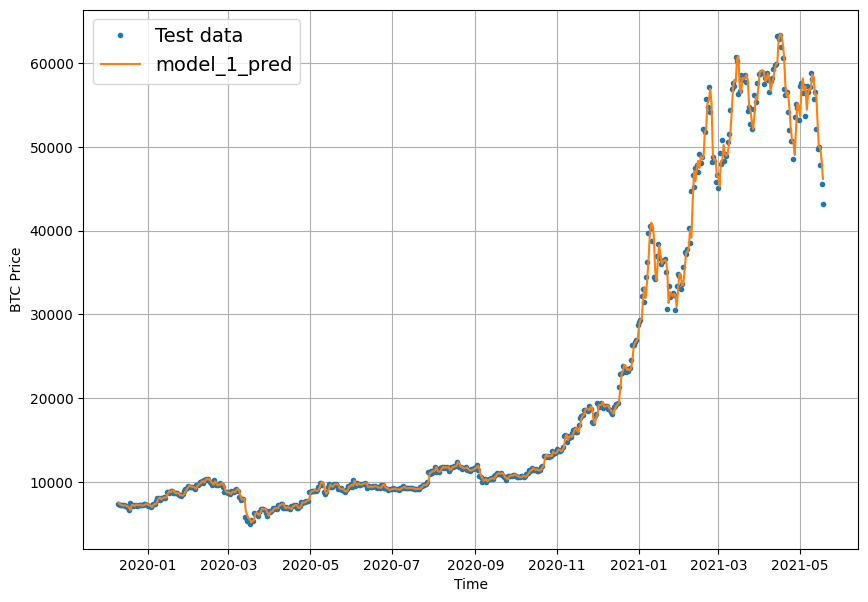

In [45]:
offset = 30
plt.figure(figsize=(10,7))

plot_time_series(X_test[-len(test_windows):], test_labels[:, 0], start=offset, label='Test data')
plot_time_series(X_test[-len(test_windows):],model_1_preds, start=offset, format='-', label='model_1_pred')


## Model 2: Dense(windows=30, horizon=1)

In [46]:
Horizon = 1
Window_size = 30

In [47]:
full_windows[:5], full_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [48]:
full_windows, full_labels = make_windows(prices, Window_size, Horizon)
full_windows, full_labels

Window indexes:
 (array([[   0,    1,    2, ...,   28,   29,   30],
       [   1,    2,    3, ...,   29,   30,   31],
       [   2,    3,    4, ...,   30,   31,   32],
       ...,
       [2754, 2755, 2756, ..., 2782, 2783, 2784],
       [2755, 2756, 2757, ..., 2783, 2784, 2785],
       [2756, 2757, 2758, ..., 2784, 2785, 2786]]), (2757, 31))


(array([[  123.65499   ,   125.455     ,   108.58483   , ...,
           187.15983   ,   192.75666   ,   197.4       ],
        [  125.455     ,   108.58483   ,   118.67466   , ...,
           192.75666   ,   197.4       ,   196.02499   ],
        [  108.58483   ,   118.67466   ,   121.33866   , ...,
           197.4       ,   196.02499   ,   198.04883   ],
        ...,
        [63346.78903511, 61965.7825981 , 60574.44472823, ...,
         52147.82118698, 49764.1320816 , 50032.69313676],
        [61965.7825981 , 60574.44472823, 56850.83016569, ...,
         49764.1320816 , 50032.69313676, 47885.62525472],
        [60574.44472823, 56850.83016569, 56224.10158771, ...,
         50032.69313676, 47885.62525472, 45604.61575361]]),
 array([[  196.02499   ],
        [  198.04883   ],
        [  198.93233   ],
        ...,
        [47885.62525472],
        [45604.61575361],
        [43144.47129086]]))

In [49]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,
                                                                                full_labels, 0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [50]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(Horizon)
], name='model_2_dense')

model_2.compile(loss='mae',
              optimizer='adam',
              metrics=['mse'])

model_2.fit(train_windows, train_labels, epochs=100, verbose=0, batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_2.name)])

In [51]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 656.2908 - mse: 1409032.3750


[656.290771484375, 1409032.375]

In [52]:
model_2 = tf.keras.models.load_model('/content/model_experiments/model_2_dense')
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 620.4174 - mse: 1346975.2500


[620.4173583984375, 1346975.25]

In [53]:
model_2_preds = make_preds(model_2, test_windows)

18/18 [==============================] - 0s 2ms/step


In [54]:
model_2_results = evaluate_preds(tf.squeeze(test_labels), tf.squeeze(model_2_preds))
model_2_results

{'mae': 620.41736,
 'mse': 1346975.2,
 'rmse': 1160.5927,
 'mape': 2.7787523,
 'mase': 1.0844957}

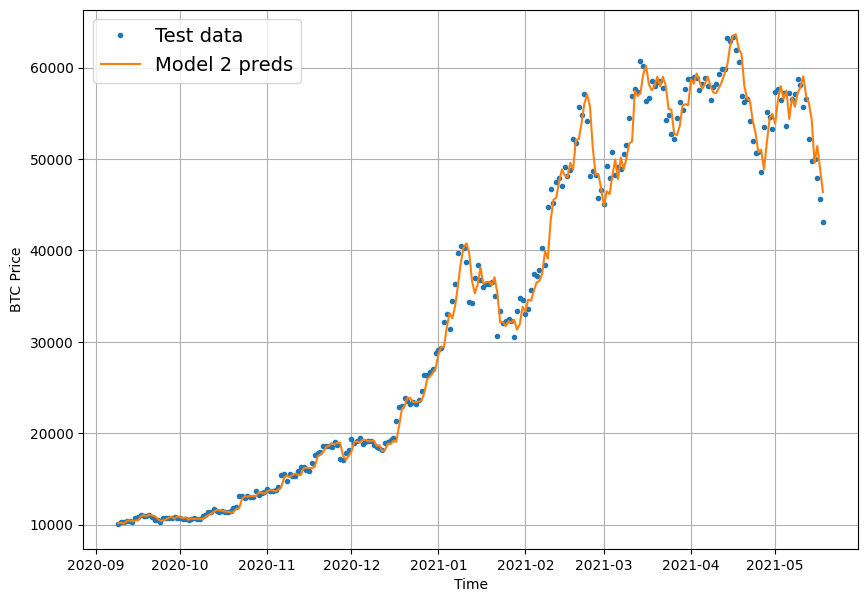

In [55]:
offset= 300
plt.figure(figsize=(10,7))
plot_time_series(X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label='Test data')
plot_time_series(X_test[-len(test_windows):], values=model_2_preds, start=offset, format='-', label='Model 2 preds')

## Model 3: Dense(windows=30, horizon=7)

In [56]:
Horizon = 7
Window_size = 30

full_windows, full_labels = make_windows(prices, Window_size, Horizon)

train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,
                                                                                full_labels)
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(Horizon)
], name='model_3_dense')

model_3.compile(loss='mae',
              optimizer='adam',
              metrics=['mae','mse'])

model_3.fit(train_windows, train_labels, epochs=100, verbose=0, batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_3.name)])

Window indexes:
 (array([[   0,    1,    2, ...,   34,   35,   36],
       [   1,    2,    3, ...,   35,   36,   37],
       [   2,    3,    4, ...,   36,   37,   38],
       ...,
       [2748, 2749, 2750, ..., 2782, 2783, 2784],
       [2749, 2750, 2751, ..., 2783, 2784, 2785],
       [2750, 2751, 2752, ..., 2784, 2785, 2786]]), (2751, 37))


In [57]:
model_3.evaluate(test_windows, test_labels)
model_3 = tf.keras.models.load_model('/content/model_experiments/model_3_dense')
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1228.7765 - mae: 1228.7765 - mse: 5279419.0000


[1228.7764892578125, 1228.7764892578125, 5279419.0]

In [58]:
model_3_preds = make_preds(model_3, test_windows)
model_3_results = evaluate_preds(tf.squeeze(test_labels), tf.squeeze(model_3_preds))
model_3_results

18/18 [==============================] - 0s 1ms/step


{'mae': array([ 617.5892  ,  398.41852 ,  278.15805 ,  471.39426 ,  396.68442 ,
         460.2806  ,  562.51044 ,  496.7728  ,  559.0541  ,  649.3433  ,
         851.14307 ,  743.73303 ,  793.0119  ,  880.5459  ,  640.63416 ,
         257.82828 ,  196.08035 ,  276.78168 ,  285.60455 ,  271.24274 ,
         217.50523 ,  233.60338 ,  353.64703 ,  248.39299 ,  167.4015  ,
         105.83956 ,  144.50711 ,  163.10442 ,  219.97112 ,  191.21059 ,
         257.1714  ,  297.51694 ,  354.64398 ,  294.986   ,  237.03572 ,
         259.57388 ,  264.18436 ,  230.29367 ,  168.64209 ,  215.92369 ,
         505.65298 ,   43.956055,  104.22343 ,  127.78327 ,  123.783   ,
         135.9963  ,   61.126118,   79.86607 ,  113.67362 ,  131.36336 ,
         105.620674,  118.41239 ,  178.51668 ,  161.31613 ,  185.84229 ,
         316.72287 ,  607.5972  ,  504.4829  ,  474.26352 ,  676.5152  ,
         295.82477 ,  231.71414 ,  240.37228 ,  316.55484 ,  389.1564  ,
         514.68994 ,  469.69574 ,  479.57492

## Make our evaluation function work for larger horizon

In [59]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scale_error(y_true, y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)


  return {'mae': mae.numpy(),
          'mse': mse.numpy(),
          'rmse': rmse.numpy(),
          'mape': mape.numpy(),
          'mase': mase.numpy()}

In [60]:
model_3_results = evaluate_preds(tf.squeeze(test_labels), tf.squeeze(model_3_preds))
model_3_results

{'mae': 1228.7765,
 'mse': 5279419.0,
 'rmse': 1412.1863,
 'mape': 5.495998,
 'mase': 2.186539}

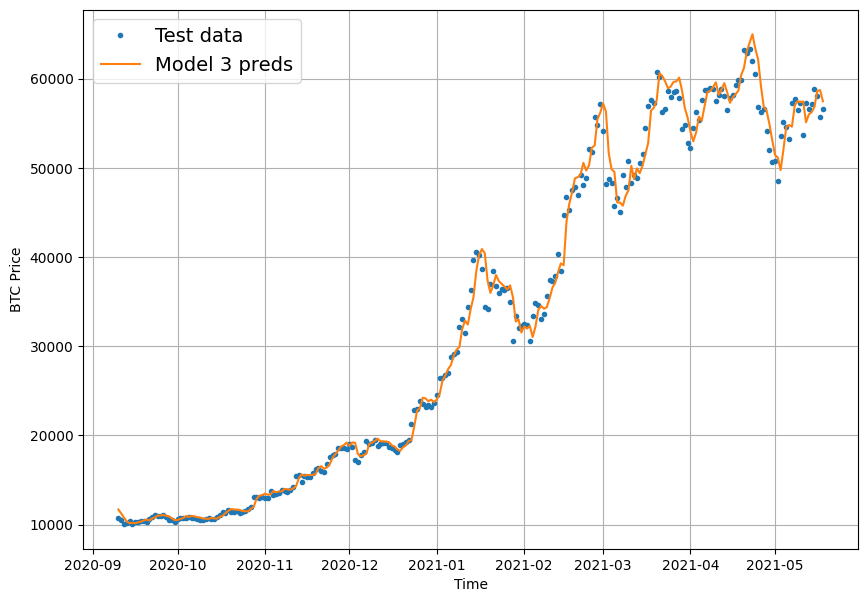

In [61]:
offset= 300
plt.figure(figsize=(10,7))
plot_time_series(X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format='.', label='Test data')
plot_time_series(X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 start=offset, format='-', label='Model 3 preds')

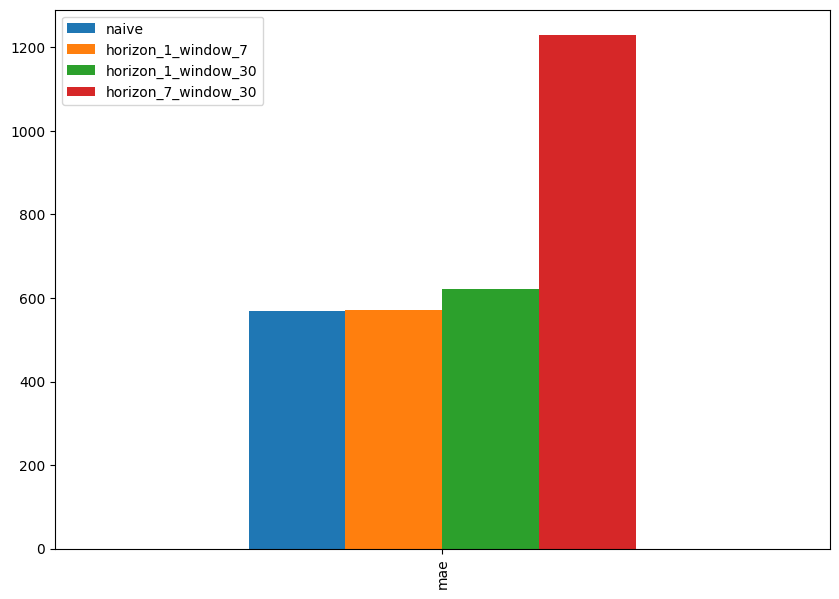

In [62]:
## Which model is preforming the best

pd.DataFrame({'naive': naive_results['mae'],
              'horizon_1_window_7': model_1_results['mae'],
              'horizon_1_window_30': model_2_results['mae'],
              'horizon_7_window_30': model_3_results['mae'],
              
              }, index=['mae']).plot(figsize=(10,7), kind='bar');

## Model 4: Conv1D

In [63]:
Horizon = 1
Window_size = 7

In [64]:
full_windows, full_labels = make_windows(prices, Window_size, Horizon)

Window indexes:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


In [65]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

Conv1D layer `(batch_size, timesteps, input_dim)`

In [66]:
train_windows[0].shape

(7,)

We have to reshape it to (7,1)

In [67]:
x = tf.constant(train_windows[0])
x.numpy()

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])

In [68]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [69]:
print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Expanded shape: {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Expanded shape: [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [70]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, padding='causal', activation='relu'),
    layers.Dense(Horizon)
], name='model_4_conv1D')

model_4.compile(loss='mae',
              optimizer='adam',
              metrics=['mse'])

model_4.fit(train_windows, train_labels, epochs=100, verbose=0, batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_4.name)])

In [71]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [72]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 643.4265 - mse: 1322002.1250


[643.426513671875, 1322002.125]

In [73]:
model_4 = tf.keras.models.load_model('/content/model_experiments/model_4_conv1D')
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 572.5980 - mse: 1190233.5000


[572.5979614257812, 1190233.5]

In [74]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds

18/18 [==============================] - 0s 2ms/step


array([[[ 8872.933 ]],

       [[ 8767.852 ]],

       [[ 8966.021 ]],

       [[ 8762.499 ]],

       [[ 8732.048 ]],

       [[ 8712.529 ]],

       [[ 8655.16  ]],

       [[ 8529.582 ]],

       [[ 8429.755 ]],

       [[ 8496.806 ]],

       [[ 8254.257 ]],

       [[ 8112.1274]],

       [[ 8039.58  ]],

       [[ 7691.0864]],

       [[ 7345.009 ]],

       [[ 7251.4424]],

       [[ 7068.577 ]],

       [[ 7157.1196]],

       [[ 7120.883 ]],

       [[ 7402.758 ]],

       [[ 7435.286 ]],

       [[ 7659.909 ]],

       [[ 7625.9014]],

       [[ 7429.6777]],

       [[ 7362.9644]],

       [[ 7287.5107]],

       [[ 7226.662 ]],

       [[ 7323.3203]],

       [[ 7469.9116]],

       [[ 7531.973 ]],

       [[ 7562.145 ]],

       [[ 7388.0234]],

       [[ 7263.194 ]],

       [[ 7188.4985]],

       [[ 7160.4404]],

       [[ 7203.578 ]],

       [[ 7094.639 ]],

       [[ 7089.2734]],

       [[ 6917.5073]],

       [[ 6631.6636]],

       [[ 7201.8735]],

       [[ 7195.0

In [75]:
test_labels.shape,  tf.squeeze(model_4_preds).shape

((556, 1), TensorShape([556]))

In [76]:
model_4_results = evaluate_preds(tf.squeeze(test_labels), tf.squeeze(model_4_preds))
model_4_results

{'mae': 572.598,
 'mse': 1190233.5,
 'rmse': 1090.9783,
 'mape': 2.5716195,
 'mase': 1.0058961}

## Model 5: RNN(LSTM)

In [77]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(Window_size))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation='relu')(x)
# x = layers.Dense(32, activation='relu')(x)
output = layers.Dense(Horizon)(x)
model_5 = tf.keras.Model(inputs, output, name='model_5_LSTM')

model_5.compile(loss='mae',
              optimizer='adam',
              metrics=['mae'])

model_5.fit(train_windows, train_labels, epochs=100, verbose=1, batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_5.name)])

Epoch 1/100
18/18 [==============================] - 5s 170ms/step - loss: 2128.8987 - mae: 2128.8987 - val_loss: 8219.9492 - val_mae: 8219.9492
Epoch 2/100
18/18 [==============================] - 2s 118ms/step - loss: 572.1339 - mae: 572.1339 - val_loss: 1838.2081 - val_mae: 1838.2081
Epoch 3/100
18/18 [==============================] - 2s 104ms/step - loss: 244.0322 - mae: 244.0322 - val_loss: 1386.6965 - val_mae: 1386.6965
Epoch 4/100
18/18 [==============================] - 2s 101ms/step - loss: 192.2164 - mae: 192.2164 - val_loss: 1058.5142 - val_mae: 1058.5142
Epoch 5/100
18/18 [==============================] - 2s 127ms/step - loss: 186.8242 - mae: 186.8242 - val_loss: 1048.4249 - val_mae: 1048.4249
Epoch 6/100
18/18 [==============================] - 2s 101ms/step - loss: 184.9334 - mae: 184.9334 - val_loss: 1029.2736 - val_mae: 1029.2736
Epoch 7/100
18/18 [==============================] - 2s 120ms/step - loss: 185.7494 - mae: 185.7494 - val_loss: 1027.2489 - val_mae: 1027.24

In [78]:
model_5 = tf.keras.models.load_model('/content/model_experiments/model_5_LSTM')
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 579.3676 - mae: 579.3676


[579.3675537109375, 579.3675537109375]

In [79]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 2ms/step


array([[8936.004],
       [8821.758],
       [8984.65 ],
       [8795.905],
       [8775.015]], dtype=float32)

In [80]:
model_5_results = evaluate_preds(tf.squeeze(test_labels), tf.squeeze(model_5_preds))
model_5_results

{'mae': 579.36755,
 'mse': 1207970.6,
 'rmse': 1099.0771,
 'mape': 2.6217167,
 'mase': 1.0177883}

In [81]:
model_1_results

{'mae': 571.34863,
 'mse': 1181143.5,
 'rmse': 1086.8042,
 'mape': 2.5761538,
 'mase': 1.0037013}

## Make a multivariate time series dataset

In [82]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [83]:
block_reward_1 = 50 # 3jan 2009
block_reward_2 = 25 # 8 nov 2012
block_reward_3 = 12.5 # 9 july 2016
block_reward_4 = 6.25 # 18 may 2020

block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [84]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [85]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

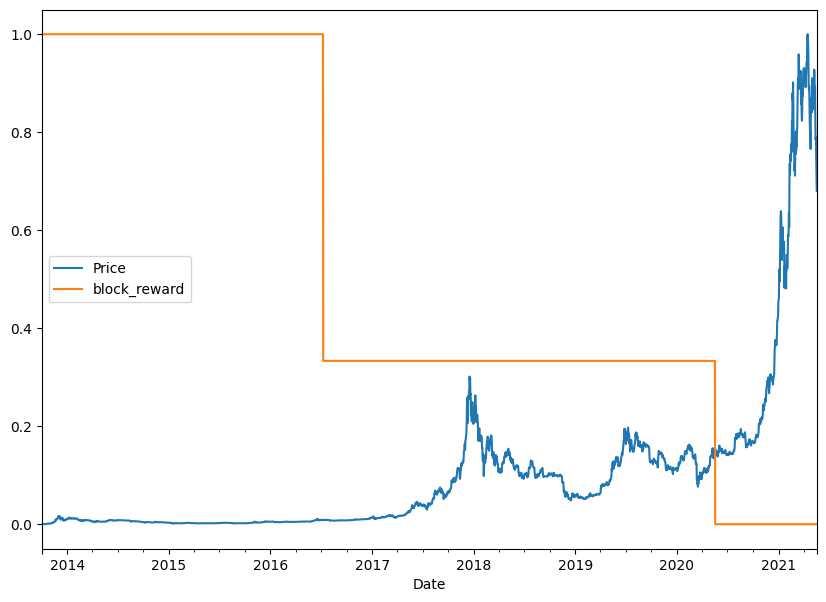

In [86]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['Price','block_reward']]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10,7));

## Making a windowed dataset with pandas


In [87]:
Horizon = 1
Window_size = 7

In [88]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()

for i in range(Window_size):
  bitcoin_prices_windowed[f'Price+{i+1}'] = bitcoin_prices_windowed['Price'].shift(periods=i+1)

bitcoin_prices_windowed

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.654990,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.455000,25,123.654990,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.584830,25,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.674660,25,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN
2013-10-05,121.338660,25,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


In [89]:
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [90]:
X = bitcoin_prices_windowed.dropna().drop('Price', axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)

In [91]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

## Model 6: Dense (multivariate time series)

In [92]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(Horizon)
], name='model_6_dense_multivariate')

model_6.compile(loss='mae',
              optimizer='adam')

model_6.fit(X_train, y_train, epochs=100, verbose=1, 
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_6.name)])

Epoch 1/100
52/70 [=====================>........] - ETA: 0s - loss: 1674.1281

70/70 [==============================] - 2s 12ms/step - loss: 1308.3983 - val_loss: 1165.4551
Epoch 2/100
61/70 [=========================>....] - ETA: 0s - loss: 206.2751

70/70 [==============================] - 1s 10ms/step - loss: 201.6238 - val_loss: 1092.6219
Epoch 3/100
63/70 [==========================>...] - ETA: 0s - loss: 187.8679

70/70 [==============================] - 1s 10ms/step - loss: 186.2564 - val_loss: 1043.8882
Epoch 4/100
54/70 [======================>.......] - ETA: 0s - loss: 182.3766

70/70 [==============================] - 1s 14ms/step - loss: 175.8656 - val_loss: 950.5887
Epoch 5/100
66/70 [===========================>..] - ETA: 0s - loss: 176.6951

70/70 [==============================] - 1s 15ms/step - loss: 174.4754 - val_loss: 877.9491
Epoch 6/100
69/70 [============================>.] - ETA: 0s - loss: 157.5536

70/70 [==============================] - 1s 18ms/step - loss: 157.1730 - val_loss: 829.0646
Epoch 7/100
70/70 [==============================] - 0s 3ms/step - loss: 150.1557 - val_loss: 864.3760
Epoch 8/100
65/70 [==========================>...] - ETA: 0s - loss: 149.5980

70/70 [==============================] - 1s 9ms/step - loss: 149.5356 - val_loss: 758.4799
Epoch 9/100
70/70 [==============================] - 0s 3ms/step - loss: 141.2810 - val_loss: 1079.4415
Epoch 10/100
70/70 [==============================] - 0s 4ms/step - loss: 151.2388 - val_loss: 810.3267
Epoch 11/100
64/70 [==========================>...] - ETA: 0s - loss: 142.5289

70/70 [==============================] - 1s 9ms/step - loss: 142.0582 - val_loss: 723.0671
Epoch 12/100
61/70 [=========================>....] - ETA: 0s - loss: 131.3669

70/70 [==============================] - 1s 9ms/step - loss: 131.1590 - val_loss: 709.0792
Epoch 13/100
62/70 [=========================>....] - ETA: 0s - loss: 126.4652

70/70 [==============================] - 1s 9ms/step - loss: 126.4132 - val_loss: 707.4898
Epoch 14/100
70/70 [==============================] - 0s 3ms/step - loss: 134.1734 - val_loss: 992.9756
Epoch 15/100
58/70 [=======================>......] - ETA: 0s - loss: 129.1105

70/70 [==============================] - 1s 9ms/step - loss: 128.3024 - val_loss: 662.9230
Epoch 16/100
70/70 [==============================] - 0s 4ms/step - loss: 123.8991 - val_loss: 666.5519
Epoch 17/100
63/70 [==========================>...] - ETA: 0s - loss: 119.9259

70/70 [==============================] - 1s 9ms/step - loss: 121.8006 - val_loss: 634.2307
Epoch 18/100
63/70 [==========================>...] - ETA: 0s - loss: 129.4715

70/70 [==============================] - 1s 9ms/step - loss: 126.5489 - val_loss: 620.5404
Epoch 19/100
70/70 [==============================] - 0s 3ms/step - loss: 124.4489 - val_loss: 623.9013
Epoch 20/100
70/70 [==============================] - 0s 3ms/step - loss: 115.5265 - val_loss: 683.1281
Epoch 21/100
70/70 [==============================] - 0s 3ms/step - loss: 119.6815 - val_loss: 643.7749
Epoch 22/100
65/70 [==========================>...] - ETA: 0s - loss: 116.8236

70/70 [==============================] - 1s 9ms/step - loss: 116.4848 - val_loss: 599.4803
Epoch 23/100
70/70 [==============================] - 0s 4ms/step - loss: 126.9881 - val_loss: 780.5143
Epoch 24/100
63/70 [==========================>...] - ETA: 0s - loss: 126.3905

70/70 [==============================] - 1s 9ms/step - loss: 123.3317 - val_loss: 594.4169
Epoch 25/100
70/70 [==============================] - 0s 3ms/step - loss: 121.9071 - val_loss: 594.5300
Epoch 26/100
70/70 [==============================] - 0s 3ms/step - loss: 125.9250 - val_loss: 647.4126
Epoch 27/100
70/70 [==============================] - 0s 4ms/step - loss: 122.8053 - val_loss: 890.8638
Epoch 28/100
62/70 [=========================>....] - ETA: 0s - loss: 116.5588

70/70 [==============================] - 1s 9ms/step - loss: 115.7913 - val_loss: 589.9917
Epoch 29/100
70/70 [==============================] - 0s 4ms/step - loss: 112.8554 - val_loss: 648.3351
Epoch 30/100
70/70 [==============================] - 0s 5ms/step - loss: 113.1351 - val_loss: 623.9052
Epoch 31/100
70/70 [==============================] - 0s 5ms/step - loss: 114.7626 - val_loss: 732.2725
Epoch 32/100
62/70 [=========================>....] - ETA: 0s - loss: 117.8413

70/70 [==============================] - 1s 13ms/step - loss: 117.1273 - val_loss: 579.8773
Epoch 33/100
70/70 [==============================] - 0s 5ms/step - loss: 114.7919 - val_loss: 656.9247
Epoch 34/100
70/70 [==============================] - 0s 4ms/step - loss: 118.4904 - val_loss: 622.8471
Epoch 35/100
60/70 [========================>.....] - ETA: 0s - loss: 111.1870

70/70 [==============================] - 1s 10ms/step - loss: 109.3564 - val_loss: 579.3924
Epoch 36/100
70/70 [==============================] - 0s 3ms/step - loss: 114.3410 - val_loss: 734.8026
Epoch 37/100
70/70 [==============================] - 0s 3ms/step - loss: 114.3463 - val_loss: 580.2573
Epoch 38/100
70/70 [==============================] - 0s 3ms/step - loss: 129.3814 - val_loss: 1106.5687
Epoch 39/100
70/70 [==============================] - 0s 4ms/step - loss: 118.9301 - val_loss: 723.2604
Epoch 40/100
61/70 [=========================>....] - ETA: 0s - loss: 130.9735

70/70 [==============================] - 1s 9ms/step - loss: 128.4599 - val_loss: 572.9662
Epoch 41/100
70/70 [==============================] - 0s 3ms/step - loss: 109.1304 - val_loss: 815.7175
Epoch 42/100
70/70 [==============================] - 0s 3ms/step - loss: 112.1259 - val_loss: 591.5563
Epoch 43/100
70/70 [==============================] - 0s 4ms/step - loss: 109.7044 - val_loss: 574.6290
Epoch 44/100
70/70 [==============================] - 0s 3ms/step - loss: 110.8858 - val_loss: 573.4868
Epoch 45/100
70/70 [==============================] - 0s 4ms/step - loss: 111.5020 - val_loss: 610.3890
Epoch 46/100
62/70 [=========================>....] - ETA: 0s - loss: 124.5649

70/70 [==============================] - 1s 9ms/step - loss: 121.0364 - val_loss: 569.0450
Epoch 47/100
70/70 [==============================] - 0s 3ms/step - loss: 110.6266 - val_loss: 719.3713
Epoch 48/100
70/70 [==============================] - 0s 4ms/step - loss: 127.2463 - val_loss: 606.0032
Epoch 49/100
70/70 [==============================] - 0s 4ms/step - loss: 113.3951 - val_loss: 601.2896
Epoch 50/100
70/70 [==============================] - 0s 3ms/step - loss: 111.0139 - val_loss: 579.2846
Epoch 51/100
70/70 [==============================] - 0s 3ms/step - loss: 113.9642 - val_loss: 636.0535
Epoch 52/100
70/70 [==============================] - 0s 4ms/step - loss: 117.5854 - val_loss: 676.7639
Epoch 53/100
70/70 [==============================] - 0s 4ms/step - loss: 109.6994 - val_loss: 584.2055
Epoch 54/100
70/70 [==============================] - 0s 3ms/step - loss: 109.9302 - val_loss: 576.6052
Epoch 55/100
70/70 [==============================] - 0s 3ms/step - loss: 108

70/70 [==============================] - 1s 9ms/step - loss: 108.2473 - val_loss: 568.1453
Epoch 57/100
70/70 [==============================] - 0s 3ms/step - loss: 111.2428 - val_loss: 579.1358
Epoch 58/100
68/70 [============================>.] - ETA: 0s - loss: 111.4940

70/70 [==============================] - 1s 9ms/step - loss: 112.1970 - val_loss: 567.7502
Epoch 59/100
70/70 [==============================] - 0s 4ms/step - loss: 112.2070 - val_loss: 568.3440
Epoch 60/100
70/70 [==============================] - 0s 3ms/step - loss: 108.7577 - val_loss: 569.6786
Epoch 61/100
70/70 [==============================] - 0s 4ms/step - loss: 114.8126 - val_loss: 610.4492
Epoch 62/100
70/70 [==============================] - 0s 4ms/step - loss: 109.9979 - val_loss: 584.5232
Epoch 63/100
70/70 [==============================] - 0s 4ms/step - loss: 109.2417 - val_loss: 576.9299
Epoch 64/100
70/70 [==============================] - 0s 3ms/step - loss: 114.2943 - val_loss: 690.7156
Epoch 65/100
59/70 [========================>.....] - ETA: 0s - loss: 112.6271

70/70 [==============================] - 1s 11ms/step - loss: 112.8657 - val_loss: 565.9837
Epoch 66/100
70/70 [==============================] - 0s 5ms/step - loss: 108.4262 - val_loss: 570.6861
Epoch 67/100
70/70 [==============================] - 0s 5ms/step - loss: 108.3397 - val_loss: 589.3163
Epoch 68/100
70/70 [==============================] - 0s 5ms/step - loss: 110.4925 - val_loss: 572.0404
Epoch 69/100
70/70 [==============================] - 0s 5ms/step - loss: 115.3999 - val_loss: 891.3102
Epoch 70/100
70/70 [==============================] - 0s 5ms/step - loss: 117.7289 - val_loss: 587.8104
Epoch 71/100
70/70 [==============================] - 0s 4ms/step - loss: 113.3117 - val_loss: 692.9290
Epoch 72/100
70/70 [==============================] - 0s 3ms/step - loss: 111.1252 - val_loss: 609.7659
Epoch 73/100
70/70 [==============================] - 0s 4ms/step - loss: 107.7197 - val_loss: 599.5275
Epoch 74/100
70/70 [==============================] - 0s 4ms/step - loss: 11

In [93]:
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 578.5719


578.5718994140625

In [94]:
model_6 = tf.keras.models.load_model('/content/model_experiments/model_6_dense_multivariate')
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 565.9837


565.9837036132812

In [95]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8836.257, 8753.849, 9035.408, 8782.776, 8714.097, 8735.961,
       8674.426, 8514.195, 8443.769, 8525.061], dtype=float32)>

In [96]:
model_6_results = evaluate_preds(y_test, model_6_preds)
model_6_results

{'mae': 565.98364,
 'mse': 1153092.0,
 'rmse': 1073.8212,
 'mape': 2.5400763,
 'mase': 0.9942765}

In [97]:
model_1_results

{'mae': 571.34863,
 'mse': 1181143.5,
 'rmse': 1086.8042,
 'mape': 2.5761538,
 'mase': 1.0037013}

In [98]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Model 7: N-BEATS algorithm

### Building and testing the N-BEATS block layer


In [99]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, 
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    self.hidden = [tf.keras.layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation='linear', name='theta')

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)

    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [100]:
# Testing our NBeats layer
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=Window_size,
                                       theta_size=Window_size + Horizon,
                                       horizon=Horizon,
                                       n_neurons=128,
                                       n_layers=4)

In [101]:
# Create dummy inputs 
dummy_inputs = tf.expand_dims(tf.range(Window_size) + 1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [102]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
print(f"Backcast: {tf.squeeze(backcast)}")
print(f"Forecast: {tf.squeeze(forecast)}")

Backcast: [ 0.5673372  -0.48157996 -0.7683405  -0.23023015  0.31578422 -0.26972848
 -0.27363214]
Forecast: 0.4207865595817566


### Preparing data for the N-BEATS algorithm using `tf.data`

In [103]:
Horizon = 1
Window_size = 7

In [104]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [105]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(Window_size):
  bitcoin_prices_nbeats[f'Prices+{i+1}'] = bitcoin_prices_nbeats['Price'].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Prices+1,Prices+2,Prices+3,Prices+4,Prices+5,Prices+6,Prices+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [106]:
X = bitcoin_prices_nbeats.dropna().drop('Price', axis=1)
y = bitcoin_prices_nbeats.dropna()['Price']

split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

In [107]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

Batch_size = 1024
train_dataset = train_dataset.batch(Batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(Batch_size).prefetch(tf.data.AUTOTUNE)

### Setting up hyperparameters for N-BEATS algorithm

In [108]:
N_epochs = 5000
N_neurons = 512
N_layers = 4
N_stacks = 30

Input_size = Window_size * Horizon
Theta_size = Input_size + Horizon

Input_size, Theta_size

(7, 8)

### Getting ready for residual connections

In [109]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

subtracted = layers.subtract([tensor_1, tensor_2])

added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
added, subtracted

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]


(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)>)

### Building, compiling and fitting the N-Beats Algorithm

In [110]:
%%time

tf.random.set_seed(42)

nbeats_block_layer = NBeatsBlock(input_size = Input_size,
                                 theta_size = Theta_size,
                                 horizon = Horizon,
                                 n_neurons = N_neurons,
                                 n_layers = N_layers,
                                 name='InitialBlock')

stack_input = layers.Input(shape=(Input_size), name='stack_input')

residuals, forecast = nbeats_block_layer(stack_input) 

for i,_ in enumerate(range(N_stacks-1)):
  backcast, block_forecast = NBeatsBlock(
      input_size=Input_size,
      theta_size=Theta_size,
      horizon=Horizon,
      n_neurons=N_neurons,
      n_layers=N_layers,
      name=f"NBeatsBlock_{i}"
  )(residuals)

  residuals = layers.subtract([residuals, backcast], name=f'subtract_{i}')
  forecast = layers.add([forecast, block_forecast], name=f'add_{i}') # Same as i+=1

model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name='model_7_NBeats')

model_7.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

model_7.fit(train_dataset,
            epochs = N_epochs,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                            patience=100,
                                                            verbose=1)])


Epoch 792: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 892: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 3min 31s, sys: 4.22 s, total: 3min 35s
Wall time: 3min 57s


In [111]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 20ms/step - loss: 579.9431


579.943115234375

In [112]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


array([[8903.795 ],
       [8816.423 ],
       [9018.822 ],
       [8792.25  ],
       [8781.057 ],
       [8766.8955],
       [8675.422 ],
       [8550.807 ],
       [8496.34  ],
       [8526.662 ]], dtype=float32)

In [113]:
model_7_results = evaluate_preds(y_test, model_7_preds)
model_7_results

{'mae': 17144.488,
 'mse': 615213900.0,
 'rmse': 23720.26,
 'mape': 113.35411,
 'mase': 30.118116}

In [114]:
model_1_results

{'mae': 571.34863,
 'mse': 1181143.5,
 'rmse': 1086.8042,
 'mape': 2.5761538,
 'mase': 1.0037013}

### Plotting the N-Beats architecture we've created

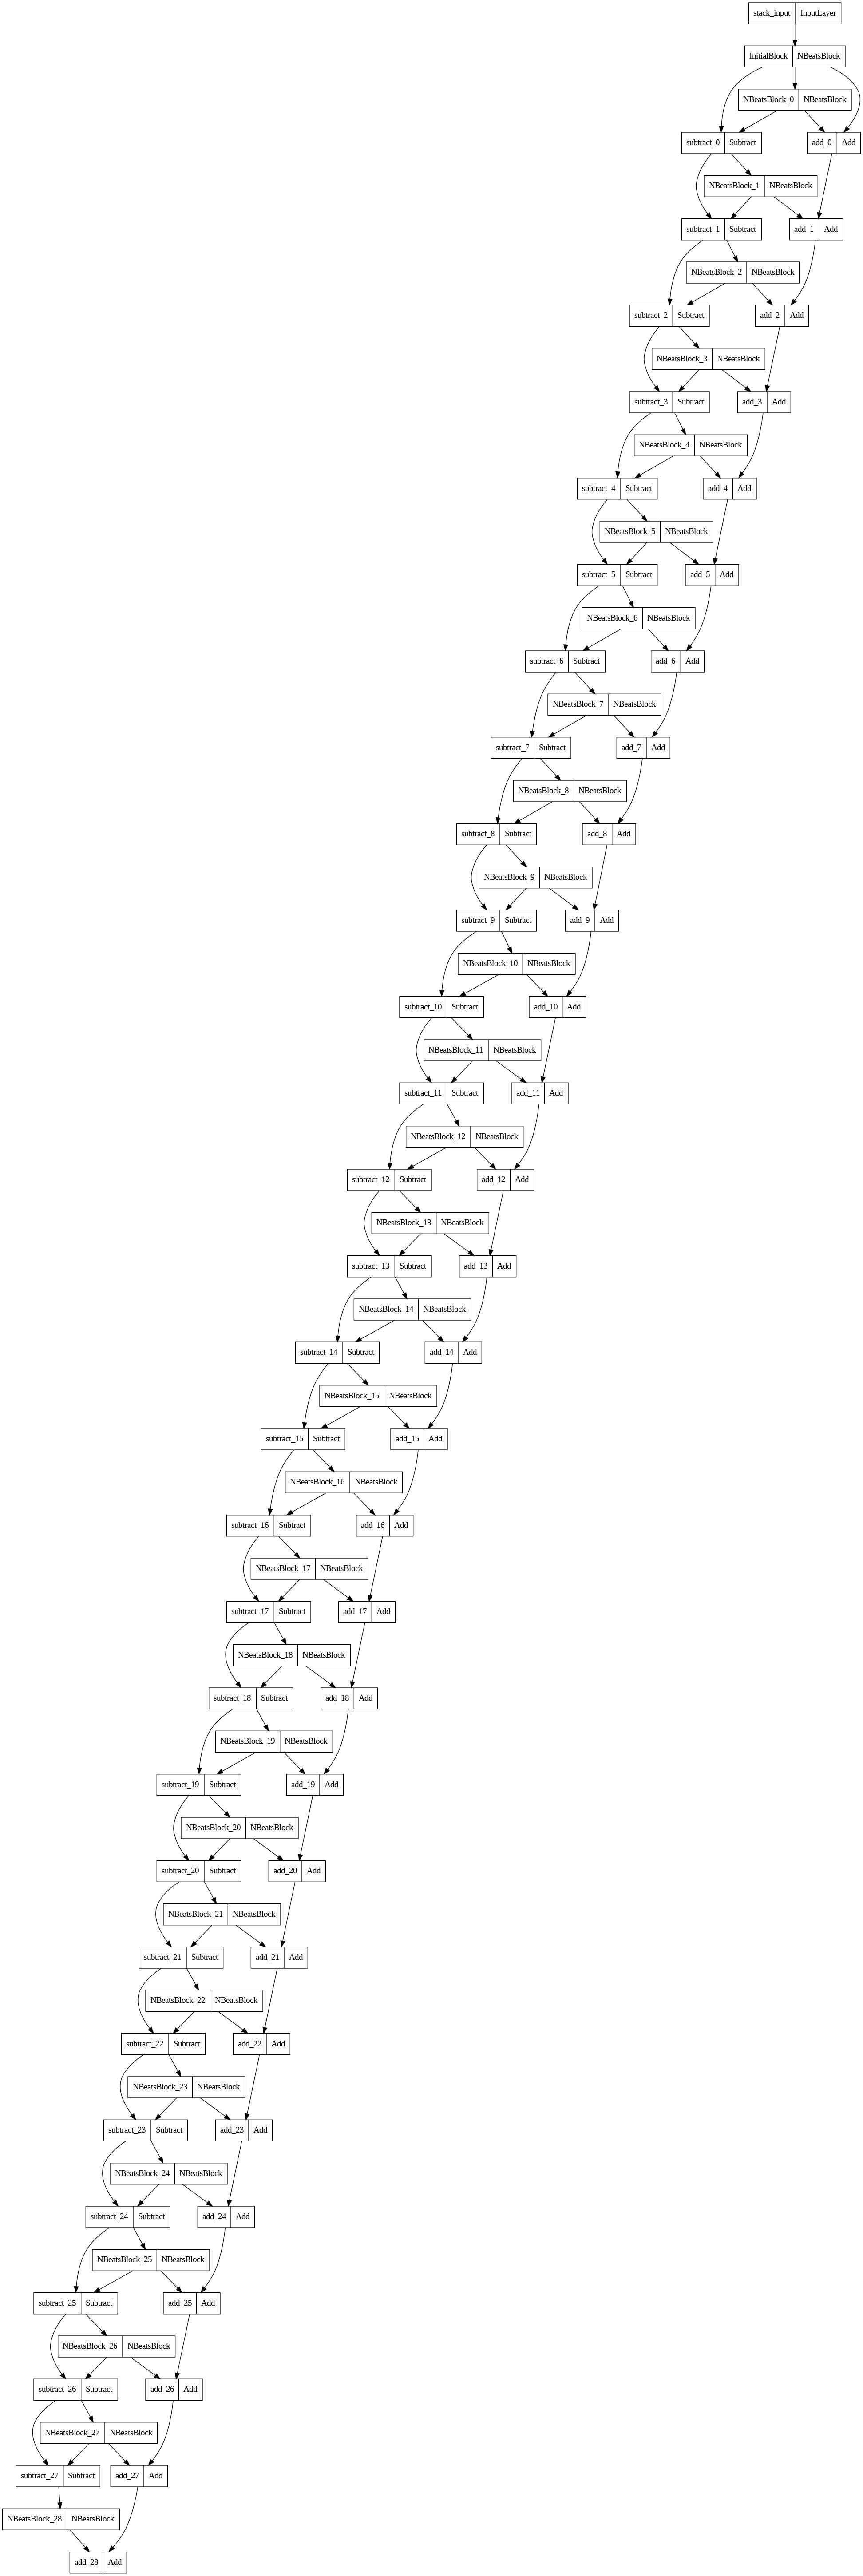

In [115]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an ensemble

In [116]:
Horizon, Window_size

(1, 7)

### Constructing and fitting an ensemble of models

In [117]:
from tensorflow.keras import layers

In [118]:

def get_ensemble_models(horizon=Horizon,
                       train_data=train_dataset,
                       test_data=test_dataset,
                       num_iter=10,
                       num_epochs=100,
                       loss_fns=['mae','mse','mape']):
  ensemble_models = []
  for i in range(num_iter):
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      model = tf.keras.Sequential([
          layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
          layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
          layers.Dense(Horizon)
      ])
      
      model.compile(loss=loss_function,
                    optimizer='adam',
                    metrics=['mae','mse'])
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                           patience=200,
                                                           restore_best_weights=True),
                          tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                               patience=100,
                                                               verbose=1)])
    
      ensemble_models.append(model)
  return ensemble_models

In [119]:
%%time
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 159: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 168: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 268: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 168: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 268: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 376: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 476: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 406: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 506: ReduceLROnPl

In [120]:
ensemble_models

### Making predictions with our ensemble models

In [121]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [122]:
%%time
ensemble_preds = make_ensemble_preds(ensemble_models, test_dataset)
ensemble_preds

1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 36ms/step
CPU times: user 702 ms, sys: 32.1 ms, total: 734 ms
Wall time: 866 ms


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8834.203,  8744.698,  9066.798, ..., 49964.105, 48556.895,
        45808.977],
       [ 8796.709,  8835.101,  9038.67 , ..., 49738.59 , 47760.727,
        46370.367],
       [ 8811.998,  8757.664,  9015.734, ..., 49347.836, 48070.44 ,
        46329.227],
       ...,
       [ 8801.6  ,  8796.447,  9098.663, ..., 50319.055, 48636.066,
        45550.79 ],
       [ 8722.198,  8782.283,  9098.913, ..., 50009.38 , 47896.934,
        46031.363],
       [ 8827.357,  8790.46 ,  9051.47 , ..., 50002.445, 48481.97 ,
        45438.61 ]], dtype=float32)>

In [123]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean 

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8787.402 ,  8771.827 ,  9062.608 ,  8707.4   ,  8752.857 ,
        8737.908 ,  8643.757 ,  8485.057 ,  8459.501 ,  8515.603 ,
        8194.939 ,  8109.202 ,  8060.809 ,  7627.0947,  7283.7974,
        7306.4927,  7065.904 ,  7189.5244,  7129.596 ,  7512.154 ,
        7391.162 ,  7727.9634,  7565.6675,  7390.336 ,  7308.3687,
        7304.1436,  7196.013 ,  7387.851 ,  7508.642 ,  7535.103 ,
        7550.47  ,  7332.799 ,  7220.865 ,  7174.2993,  7176.6997,
        7226.5044,  7079.4185,  7096.412 ,  6868.2954,  6587.2715,
        7385.205 ,  7154.8306,  7144.1924,  7283.7153,  7261.143 ,
        7181.0244,  7227.2964,  7202.284 ,  7170.109 ,  7213.265 ,
        7302.7354,  7382.7036,  7247.57  ,  7168.7827,  7153.839 ,
        6939.963 ,  7270.6265,  7336.3066,  7350.6094,  7714.987 ,
        8066.197 ,  8142.355 ,  7866.056 ,  8084.7964,  8101.783 ,
        8159.4546,  8112.433 ,  8732.382 ,  8896.34  ,  8771.6875,
        8943.2

In [124]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median 

array([ 8800.083 ,  8765.102 ,  9059.07  ,  8699.963 ,  8750.294 ,
        8748.009 ,  8645.032 ,  8487.922 ,  8455.306 ,  8516.822 ,
        8186.619 ,  8096.3877,  8070.2046,  7632.325 ,  7273.846 ,
        7314.445 ,  7063.4136,  7202.0703,  7144.7793,  7515.5723,
        7389.9766,  7722.7363,  7557.7925,  7389.231 ,  7290.    ,
        7306.8257,  7203.2437,  7395.1997,  7502.862 ,  7532.473 ,
        7548.0093,  7320.603 ,  7221.72  ,  7175.3994,  7170.538 ,
        7228.608 ,  7084.3325,  7095.5845,  6868.9927,  6593.123 ,
        7383.2495,  7168.764 ,  7142.9663,  7288.2964,  7273.318 ,
        7164.1113,  7224.9526,  7205.923 ,  7168.497 ,  7209.8696,
        7304.3223,  7381.86  ,  7237.026 ,  7165.733 ,  7158.014 ,
        6934.2593,  7272.9233,  7332.6616,  7356.4062,  7725.186 ,
        8072.921 ,  8142.0854,  7858.8765,  8080.7188,  8103.7925,
        8165.638 ,  8111.553 ,  8735.531 ,  8902.053 ,  8768.605 ,
        8946.053 ,  8975.21  ,  8662.996 ,  8623.74  ,  8694.7

In [125]:
ensemble_results = evaluate_preds(y_test, ensemble_mean)
ensemble_results 

{'mae': 566.689,
 'mse': 1141522.6,
 'rmse': 1068.4207,
 'mape': 2.571202,
 'mase': 0.99551564}

In [126]:
ensemble_results = evaluate_preds(y_test, ensemble_median)
ensemble_results 

{'mae': 567.6461,
 'mse': 1146586.0,
 'rmse': 1070.7876,
 'mape': 2.5838058,
 'mase': 0.99719703}

### Plotting the prediction intervals (uncertainity estimates)

Finding out range of our predictions from which our value came from.

In [127]:
# Find the upper and lower bounds
def get_upper_lower(preds):
  std = tf.math.reduce_std(preds, axis=0)
  interval = 1.96*std
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

In [128]:
lower, upper = get_upper_lower(ensemble_preds)

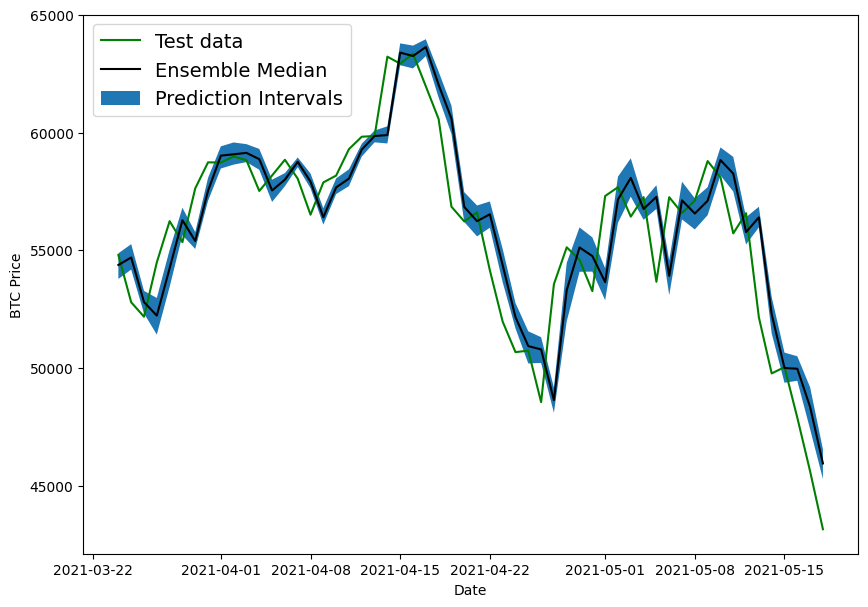

In [129]:
ensemble_median = np.median(ensemble_preds, axis=0)
offset = 500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:], y_test[offset:], 'g', label='Test data')
plt.plot(X_test.index[offset:], ensemble_median[offset:], 'k-', label='Ensemble Median')
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:],
                 label='Prediction Intervals')
plt.legend(loc='upper left', fontsize=14);

All of our models lag behind the test data.

## Model 9: Train a model on full historic data to make predicitons into the future

In [130]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [131]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [132]:
# Train model on entire data
X_all = bitcoin_prices_windowed.dropna().drop(['Price','block_reward'], axis=1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()['Price'].to_numpy()

In [133]:
X_all[:10], y_all[:10]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866],
        [125.9275 , 125.27966, 125.96116, 124.049  , 123.033  , 121.795  ,
         120.65533],
        [126.38333, 125.9275 , 125.27966, 125.96116, 124.049  , 123.033  ,
         121.795  ],
        [135.24199, 126.38333, 125.9275 , 125.27966, 125.96116, 124.049  ,
         123.033  ],
        [133.20333, 135.24199, 126.38333, 125.9275 , 125.27966, 125.96116,
         124.049  ],
        [142.76333, 133.20333, 135.24199, 126.38333, 125.9275 , 125.27966,
         125.96116]]),
 array([123.033  , 124.049  , 125.9611

In [134]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))
dataset_all = dataset_all.batch(1024).prefetch(tf.data.AUTOTUNE)

In [135]:
tf.random.set_seed(42)
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(Horizon),
], name='model_9_future')
model_9.compile(loss='mae',
                optimizer='adam')
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

### Make predicitons into future

In [136]:
Into_future = 14

In [137]:
def make_future_forecasts(values, model, into_future, window_size=Window_size):
  future_forecast = []
  last_window = values[-window_size:]

  for _ in range(Into_future):
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n{last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    future_forecast.append(tf.squeeze(future_pred).numpy())

    last_window = np.append(last_window, future_pred)[-window_size:]
  return future_forecast


In [138]:
future_forecast = make_future_forecasts(y_all, model_9, Into_future, Window_size)

1/1 [==============================] - 0s 55ms/step
Predicting on:
[56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55803.02734375

1/1 [==============================] - 0s 17ms/step
Predicting on:
[52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55803.02734375] -> Prediction: 52584.18359375

1/1 [==============================] - 0s 19ms/step
Predicting on:
[49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55803.02734375 52584.18359375] -> Prediction: 49730.37109375

1/1 [==============================] - 0s 19ms/step
Predicting on:
[50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55803.02734375 52584.18359375 49730.37109375] -> Prediction: 47790.14453125

1/1 [==============================] - 0s 22ms/step
Predicting on:
[47885.62525472 45604.61575361 43144.47129086 55803.02734375
 52584.18359375 49730.37109375 47790.14453125] -

### Plot future forecasts


In [139]:
def get_future_dates(start_date, into_future, offset=1):
  start_date = start_date + np.timedelta64(offset,'D')
  end_date = start_date + np.timedelta64(into_future, 'D')

  return np.arange(start_date, end_date, dtype='datetime64[D]')

In [140]:
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [141]:
next_time_steps = get_future_dates(last_timestep, Into_future)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [142]:
next_time_steps = np.insert(next_time_steps, 0 ,last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])

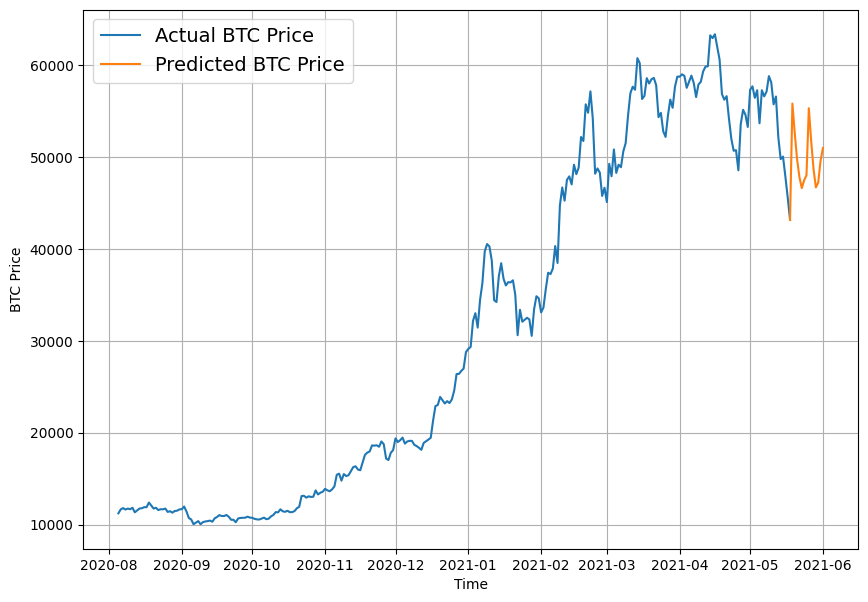

In [143]:
plt.figure(figsize=(10,7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format='-', label='Actual BTC Price')
plot_time_series(next_time_steps, future_forecast, format='-', label='Predicted BTC Price')

## Model 10: Why forecasting is BS (The Turkey Problem)

In [144]:
btc_price_turkey = btc_price.copy()
len(btc_price_turkey)

2787

In [145]:
btc_price_turkey[-1] = btc_price_turkey[-1]/100

In [146]:
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [147]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey

array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
       '2013-10-03T00:00:00.000000000', ...,
       '2021-05-16T00:00:00.000000000', '2021-05-17T00:00:00.000000000',
       '2021-05-18T00:00:00.000000000'], dtype='datetime64[ns]')

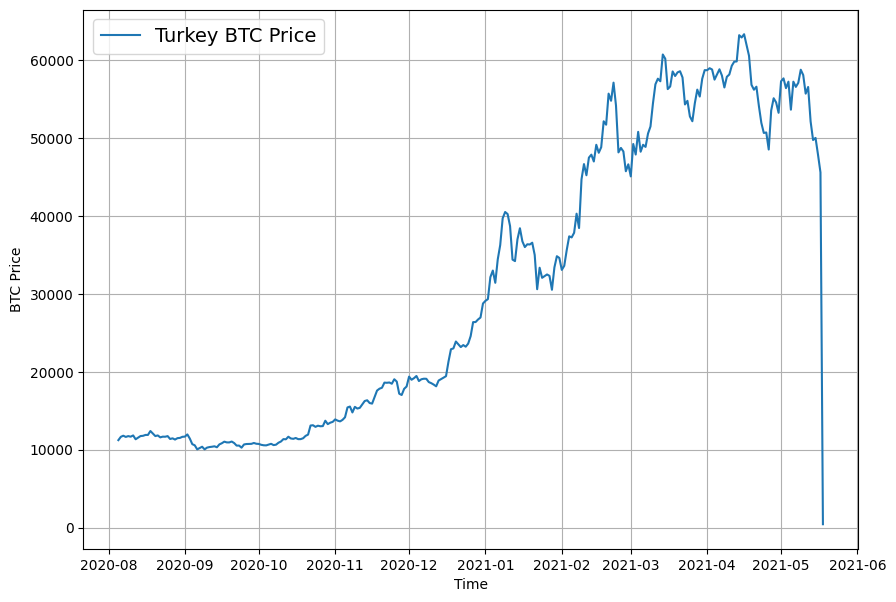

In [148]:
plt.figure(figsize=(10,7))
plot_time_series(btc_timesteps_turkey, btc_price_turkey, start=2500, format='-', label='Turkey BTC Price')

In [149]:
full_windows, full_labels = make_windows(np.array(btc_price_turkey), Window_size, Horizon)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)

Window indexes:
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


### Build a turkey model

In [150]:
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = 'model_10_turkey_model'
turkey_model.compile(loss='mae',
                optimizer='adam')
turkey_model.fit(X_train, y_train,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(turkey_model.name)])

In [151]:
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 647.3310


647.3309936523438

In [152]:
turkey_model = tf.keras.models.load_model("/content/model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 638.5298


638.5298461914062

In [153]:
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 1ms/step


array([[8831.131],
       [8792.641],
       [9045.984],
       [8765.005],
       [8762.381],
       [8720.371],
       [8683.743],
       [8533.348],
       [8451.802],
       [8538.239]], dtype=float32)

In [154]:
turkey_results = evaluate_preds(y_test, turkey_preds)
turkey_results

{'mae': 638.52997,
 'mse': 4867691.5,
 'rmse': 638.52997,
 'mape': 21.515615,
 'mase': 0.9881272}

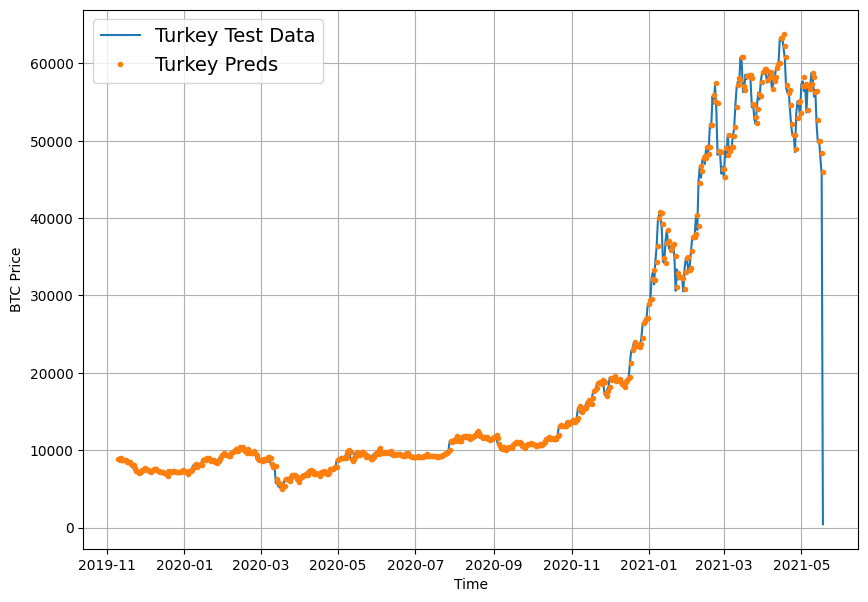

In [155]:
offset= 0
plt.figure(figsize=(10,7))
plot_time_series(btc_timesteps_turkey[-len(X_test):], values=btc_price_turkey[-len(y_test):], start=offset, format='-', label='Turkey Test Data')
plot_time_series(btc_timesteps_turkey[-len(X_test):], 
                 values=turkey_preds, 
                 start=offset, format='.', label='Turkey Preds')

## Compare Models:


In [156]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,571.348633,1.181144e+06,1086.804199,2.576154,1.003701
model_2_dense_w30_h1,620.417358,1.346975e+06,1160.592651,2.778752,1.084496
model_3_dense_w30_h7,1228.776489,5.279419e+06,1412.186279,5.495998,2.186539
model_4_CONV1D,572.598022,1.190234e+06,1090.978271,2.571620,1.005896
model_5_LSTM,579.367554,1.207971e+06,1099.077148,2.621717,1.017788
model_6_multivariate,565.983643,1.153092e+06,1073.821167,2.540076,0.994277
model_8_NBEATs,17144.488281,6.152139e+08,23720.259766,113.354111,30.118116
model_9_ensemble,567.646118,1.146586e+06,1070.787598,2.583806,0.997197
model_10_turkey,638.529968,4.867692e+06,638.529968,21.515615,0.988127


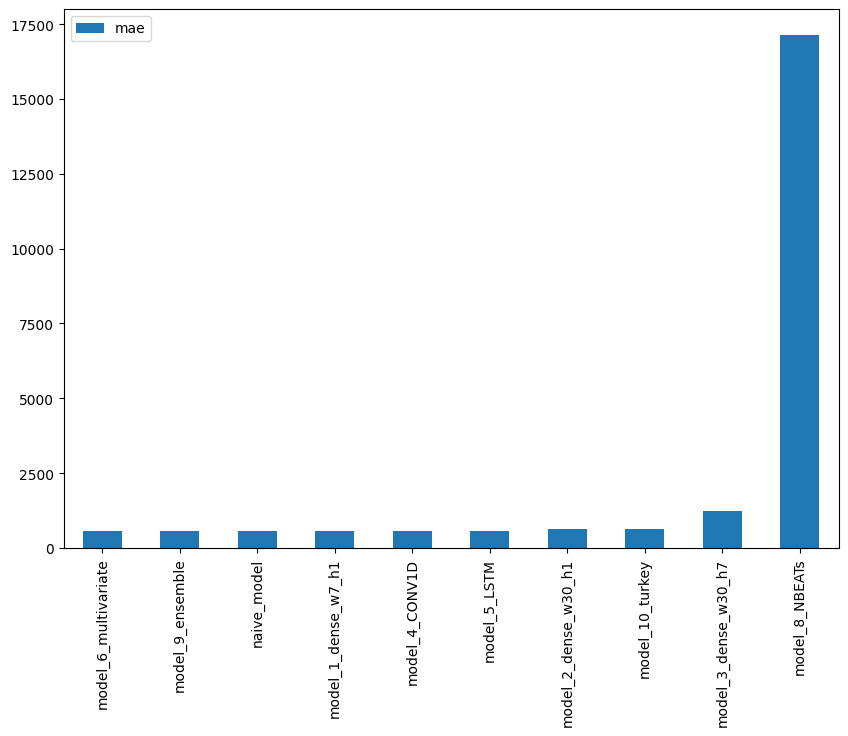

In [157]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");